In [2]:
#Import dependencies
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

#Import model
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [3]:
def load_image (img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis, :]   #we are making sure that our image is in new array; here indexer grabs the entire image
  return img

In [4]:
from google.colab import files
from IPython.display import Image

In [5]:
uploaded = files.upload()   #uploading content style image from desktop

Saving YellowLabradorLooking_new.jpg to YellowLabradorLooking_new.jpg


In [6]:
uploaded = files.upload()   #uploading artistic style image

Saving Vassily_Kandinsky,_1913_-_Composition_7.jpg to Vassily_Kandinsky,_1913_-_Composition_7.jpg


In [8]:
content_image = load_image('YellowLabradorLooking_new.jpg')
style_image = load_image('Vassily_Kandinsky,_1913_-_Composition_7.jpg')

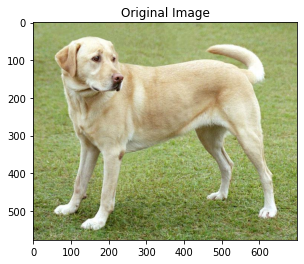

TensorShape([1, 577, 700, 3])

In [9]:
plt.imshow(np.squeeze(content_image))
plt.title("Original Image")
plt.show()

content_image.shape

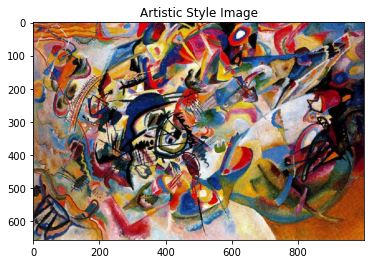

TensorShape([1, 657, 1000, 3])

In [10]:
plt.imshow(np.squeeze(style_image))
plt.title("Artistic Style Image")
plt.show()

style_image.shape

In [11]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image)) [0]

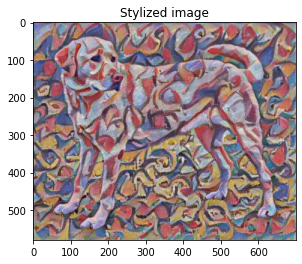

In [12]:
plt.imshow(np.squeeze(stylized_image))
plt.title("Stylized image")
plt.show()


In [ ]:
cv2.imwrite('Stylized_image.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB)) #saving final output to system

True